In [2]:
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting
from sklearn.datasets import load_iris # 아이리스 품종 분류 데이터
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
from sklearn.model_selection import train_test_split

plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글폰트 전역 설정

In [3]:
data = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, random_state=0)

In [4]:
clf0 = DT(max_depth=3, random_state=0)
clf0.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

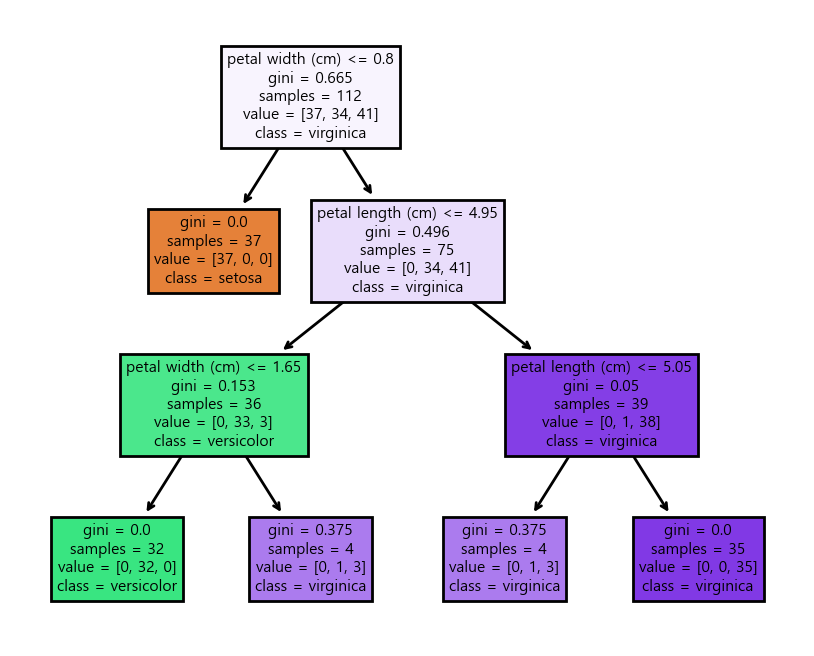

In [7]:
plt.figure(figsize=(5,4), dpi=200)
plot_tree(clf0, 
          feature_names = data.feature_names,#["꽃받침길이", "꽃받침폭",  "꽃잎길이", "꽃잎폭" ], 
          class_names = list(data.target_names),
          #class_names = data.target_names,
          filled=True)
plt.show()

https://www.kaggle.com/code/alexisbcook/distributions

In [8]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting
from sklearn.datasets import load_breast_cancer # 유방암데이터
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, \
    accuracy_score, f1_score, precision_score, recall_score, \
    roc_auc_score, roc_curve, auc

plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글폰트 전역 설정

In [25]:
data = load_breast_cancer()
print("Data dimension:", data.data.shape)
X_tr, X_te, y_tr, y_te = train_test_split(data.data, data.target, test_size=0.3, random_state=0)
print("Train Data:", X_tr.shape, "Test Data:", X_te.shape)

Data dimension: (569, 30)
Train Data: (398, 30) Test Data: (171, 30)


In [26]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


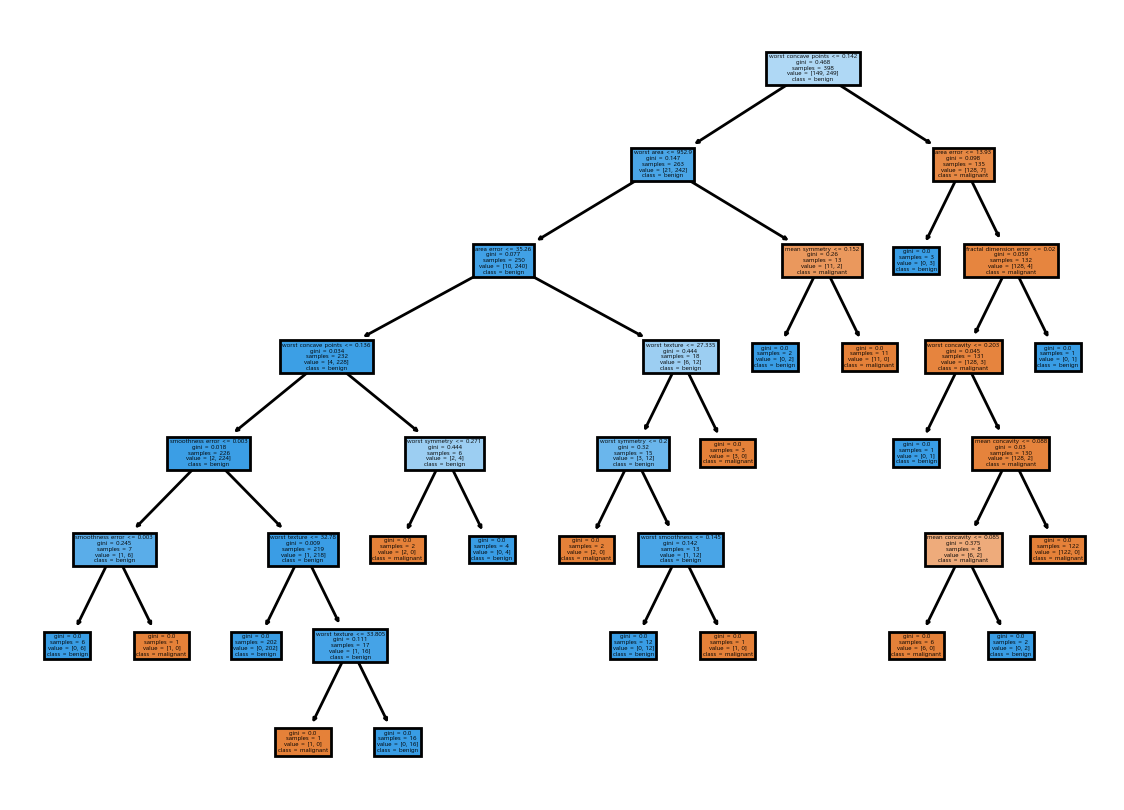

In [27]:
clf = DT(random_state=0)
clf = clf.fit(X_tr, y_tr)
plt.figure(figsize=(7,5), dpi=200)
plot_tree(clf, filled=True, feature_names=list(data.feature_names), class_names=list(data.target_names))
#plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

[0.         0.00249033 0.00463858 0.00487285 0.00489632 0.00742172
 0.0080402  0.00838676 0.00850406 0.01386055 0.04035621 0.33798172] [0.         0.00996131 0.01459989 0.03409128 0.04388392 0.05130564
 0.05934584 0.0677326  0.07623666 0.09009721 0.13045342 0.46843514]


Text(0.5, 1.0, 'ccp alpha vs total impurity for training set')

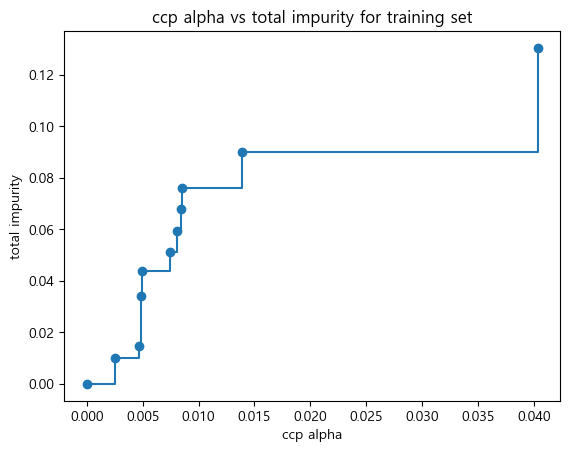

In [28]:
path = clf.cost_complexity_pruning_path(X_tr, y_tr)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("ccp alpha")
ax.set_ylabel("total impurity")
ax.set_title("ccp alpha vs total impurity for training set")   

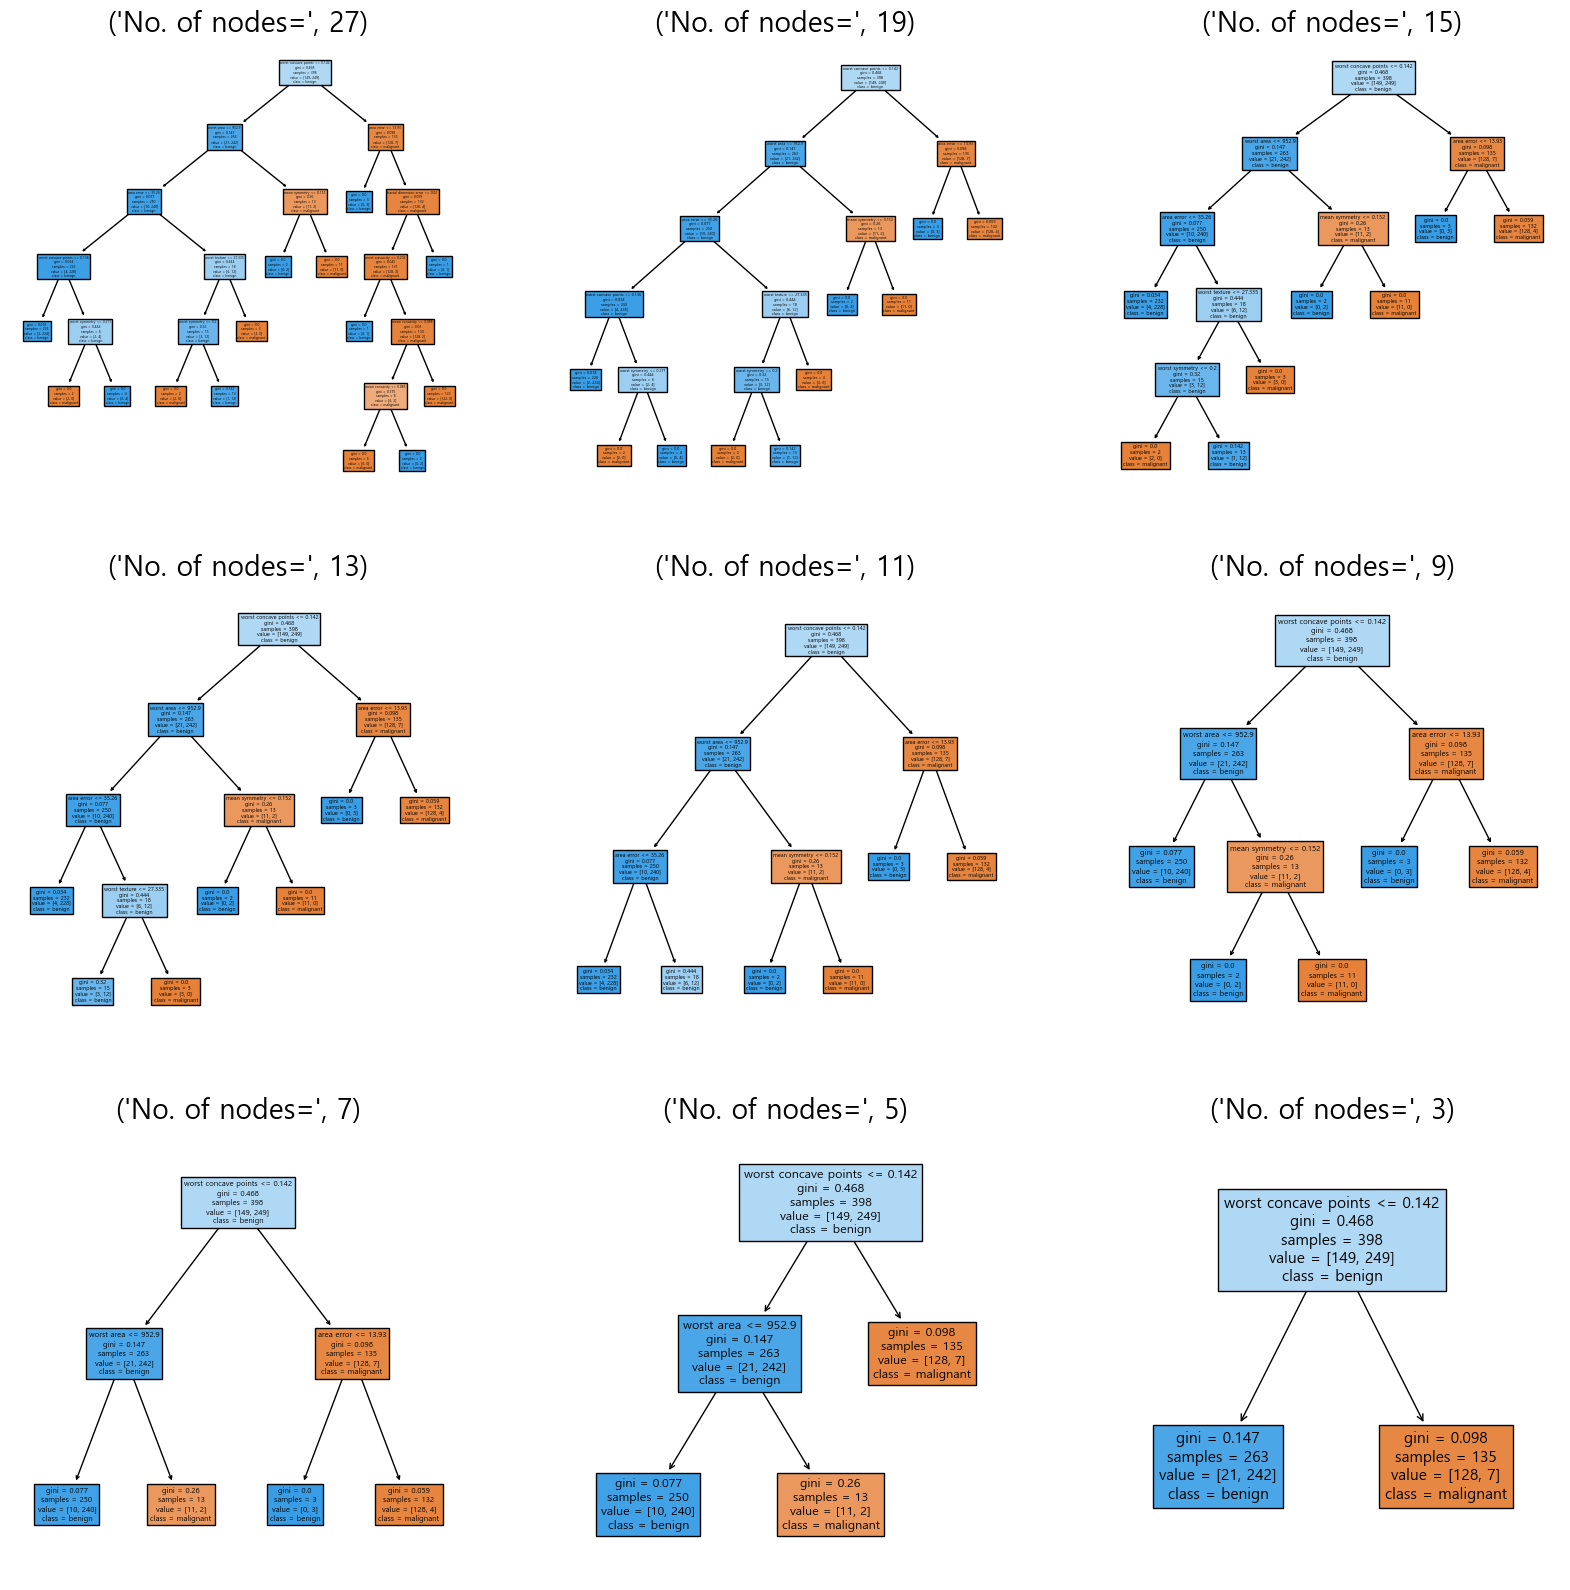

In [29]:
clfs = []
for ccp_alpha in ccp_alphas[:-1]:
    clf_ = DT(random_state=0, ccp_alpha=ccp_alpha)
    clf_.fit(X_tr, y_tr)
    clfs.append(clf_)

# numbers of nodes for each tree model
t_nodes = [clf.tree_.node_count for clf in clfs]

import numpy as np
fig, ax = plt.subplots(3,3, figsize=(20, 20))  
k = 0
for tree_m in clfs[2:]:
    i = k//3 
    j = k%3
    plot_tree(tree_m, feature_names = data.feature_names,
         class_names=data.target_names, filled=True, ax=ax[i,j])
    ax[i,j].set_title(("No. of nodes=", tree_m.tree_.node_count), fontsize=20)
    k += 1
plt.show() 

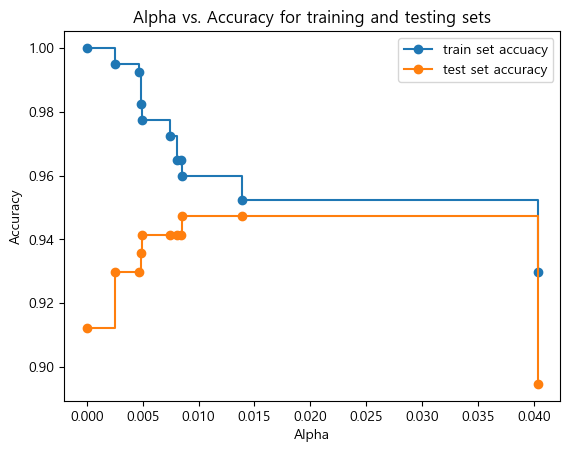

In [30]:
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas[:-1]:
    clf0 = DT(random_state=0, ccp_alpha=ccp_alpha)
    clf0.fit(X_tr, y_tr) # 모형적합
    train_scores.append(clf0.score(X_tr, y_tr)) # 
    test_scores.append(clf0.score(X_te, y_te))

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha vs. Accuracy for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train set accuacy", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test set accuracy", drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
df = pd.DataFrame({"test acc": test_scores, "alpha":ccp_alphas[:-1]})
print(df)
# 정분류율이 가장 작은 모형 선택
max_idx = df["test acc"].idxmax()
print("optimal tree index",max_idx, "optimal alpha", ccp_alphas[max_idx]) #

    test acc     alpha
0   0.912281  0.000000
1   0.929825  0.002490
2   0.929825  0.004639
3   0.935673  0.004873
4   0.941520  0.004896
5   0.941520  0.007422
6   0.941520  0.008040
7   0.941520  0.008387
8   0.947368  0.008504
9   0.947368  0.013861
10  0.894737  0.040356
optimal tree index 8 optimal alpha 0.008504058755315036


In [32]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Users\\jcastle\\anaconda3\\envs\\3.10.8\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

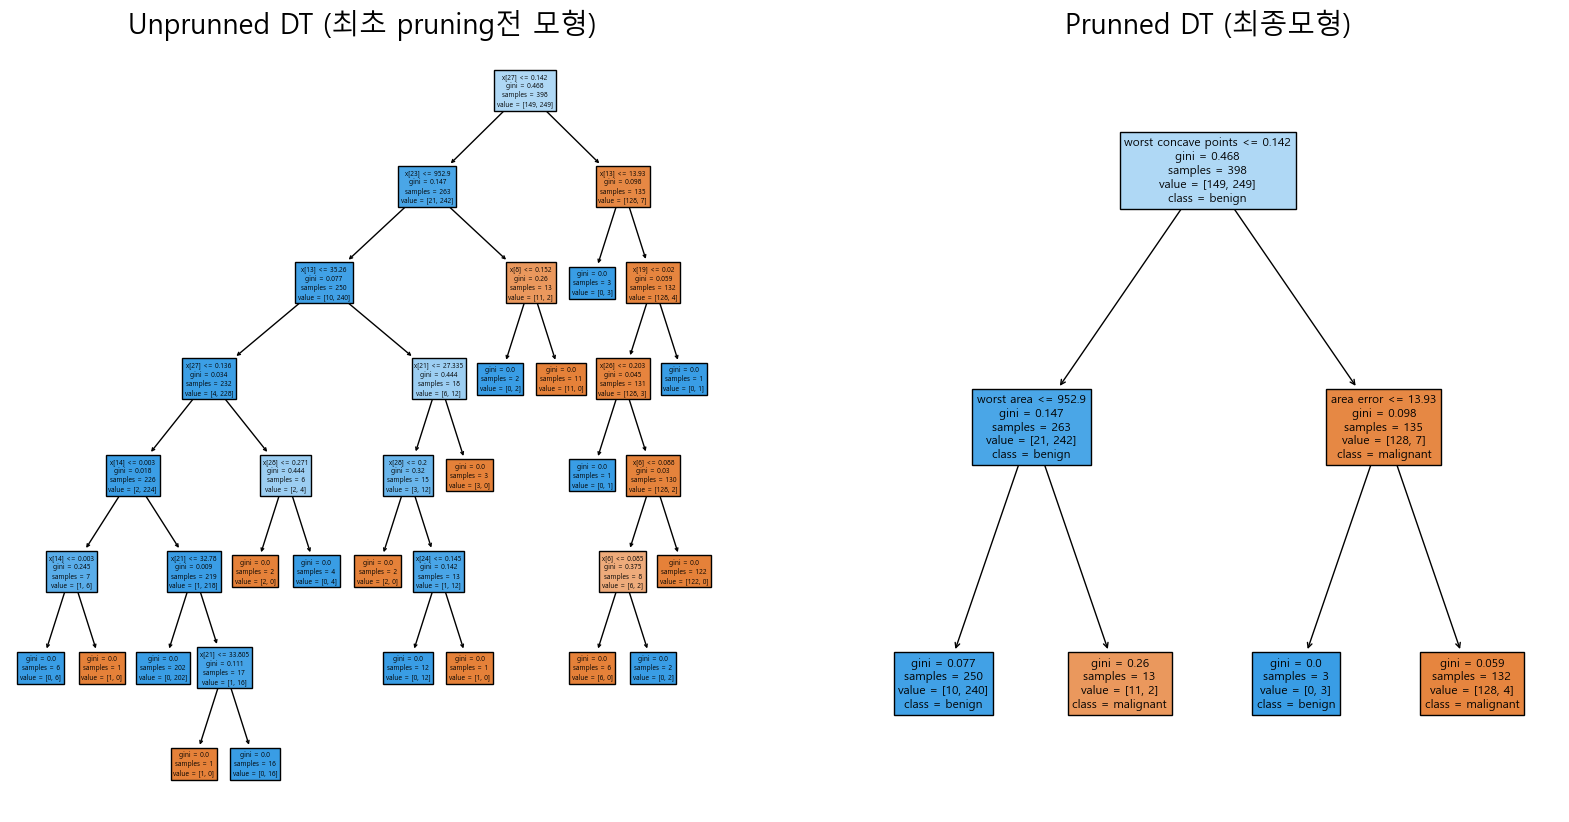

In [33]:
# 최종모형 선택
clf_p = clfs[max_idx]
# 모형비교
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # whatever size you want
plot_tree(clf, filled=True, ax=ax[0])
plot_tree(
    clf_p,
    filled=True,
    ax=ax[1],
    feature_names=data.feature_names,
    class_names=data.target_names,
)
ax[0].set_title("Unprunned DT (최초 pruning전 모형)", fontsize=20)
ax[1].set_title("Prunned DT (최종모형)", fontsize=20)
plt.show()

In [34]:
# Evaluation metric
from sklearn.metrics import confusion_matrix, \
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

y_pred = clf_p.predict(X_te)
y_te[:10], y_pred[:10]

print("confusion_matrix\n", confusion_matrix(y_te, y_pred))
print("accuracy_score\n",accuracy_score(y_te, y_pred))
print("precision_score\n",precision_score(y_te, y_pred))
print("recall_score\n",recall_score(y_te, y_pred))
print("f1_score\n",accuracy_score(y_te, y_pred))

confusion_matrix
 [[ 60   3]
 [  6 102]]
accuracy_score
 0.9473684210526315
precision_score
 0.9714285714285714
recall_score
 0.9444444444444444
f1_score
 0.9473684210526315


[0.         0.06349206 1.        ] [0.         0.89814815 1.        ]


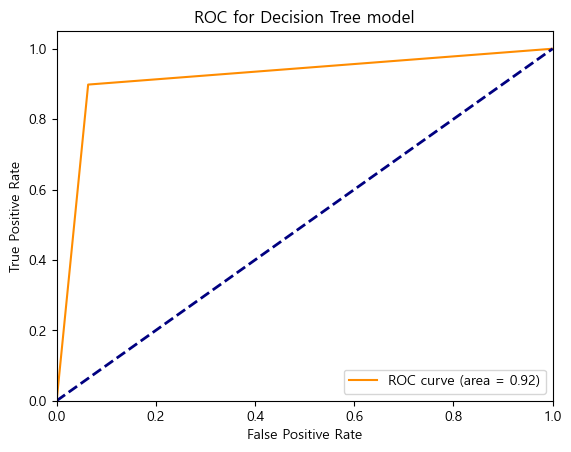

In [35]:
# ROC를 계산하기 위해서는 확률예측을 해야함
y_pred2 = clf.predict_proba(X_te)
fpr, tpr, _ = roc_curve(y_te, y_pred2[:, 1])
print(fpr, tpr)
roc_auc = auc(fpr, tpr) # auc 계산

plt.figure()
plt.plot(fpr, tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Decision Tree model")
plt.legend(loc="lower right")
plt.show()